In [1]:
import os
import pandas as pd
import numpy as np
import anndata as ann
os.chdir('../spatialdm/')

In [2]:
from main import *
# from main_sparse import *
from plottings import *

In [3]:
# load anndata
os.chdir('datasets/')
from dataset import *
adata = melanoma()

/home/yoyo/miniconda2/envs/CC/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [4]:
raw = pd.DataFrame(adata.raw.X, index=adata.obs_names, columns=adata.var_names)
raw.head()

,PSME2,CUEDC1,RPLP1,TM9SF3,DEF8,RPL37A,NELL1,MFGE8,AIP,TSC22D3,...,TREM1,C2CD4A,TAF1L,PEBP4,BCL2L15,MYBPC2,RHOD,PPEF1,CKMT2,PGM5P2
1,2,0,21,0,0,28,2,2,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,13,0,0,13,0,3,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,13,0,0,15,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,18,0,1,17,2,3,1,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,10,0,0,3,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
spatialcoord = pd.DataFrame(adata.obsm['spatial'], index=adata.obs_names, columns=['x','y'])
spatialcoord.head()

,x,y
1,15,7
2,16,7
3,17,7
4,18,7
5,13,8


In [165]:
# # alternatively load via pandas
# datadir = '/home/yoyo/1_spatial/1_Tumor/data/'

# spatialcoord = pd.read_csv(datadir+'spatialcoord.csv', index_col=0)
# spatialcoord.columns = ['x', 'y']
# spatialcoord.head()

# exp=pd.read_csv(datadir + 'logcounts.csv',header=0,index_col=0)
# exp = exp.transpose()
# exp.index = spatialcoord.index
# exp.head()

## SpatialDM permutation approach

In [6]:
my_sample = SpatialDM(raw, spatialcoord)     # load spatial data

my_sample.weight_matrix(l=1.2, cutoff=0.2, single_cell=False) # weight_matrix by rbf kernel

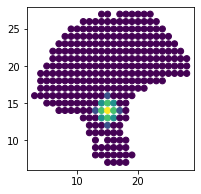

In [8]:
# visualize range of interaction
plt.figure(figsize=(3,3))
plt.scatter(my_sample.spatialcoord.x, my_sample.spatialcoord.y, c=my_sample.rbf_d[50])

In [9]:
my_sample.extract_lr('human', '/home/yoyo/1_spatial', min_cell=3)      # find overlapping LRs from CellChatDB

In [10]:
my_sample.spatialdm_global(1000, select_num=None, method='permutation',nproc=50)     # global Moran selection
my_sample.sig_pairs(method='permutation', fdr=True, threshold=0.1)     # select significant pairs

0 pairs global selection finished in: 0.2918579578399658
1 pairs global selection finished in: 0.2845287322998047
2 pairs global selection finished in: 0.29213953018188477
3 pairs global selection finished in: 0.3037261962890625
4 pairs global selection finished in: 0.29321980476379395
5 pairs global selection finished in: 0.2895042896270752
6 pairs global selection finished in: 0.2919120788574219
7 pairs global selection finished in: 0.34450340270996094
8 pairs global selection finished in: 0.2792539596557617
9 pairs global selection finished in: 0.2862827777862549
10 pairs global selection finished in: 0.2859492301940918
11 pairs global selection finished in: 0.28525352478027344
12 pairs global selection finished in: 0.2824547290802002
13 pairs global selection finished in: 0.29408764839172363
14 pairs global selection finished in: 0.28133654594421387
15 pairs global selection finished in: 0.2839469909667969
16 pairs global selection finished in: 0.34590578079223633
17 pairs global s

140 pairs global selection finished in: 0.2863037586212158
141 pairs global selection finished in: 0.33269405364990234
142 pairs global selection finished in: 0.2804884910583496
143 pairs global selection finished in: 0.28987550735473633
144 pairs global selection finished in: 0.29892635345458984
145 pairs global selection finished in: 0.31980443000793457
146 pairs global selection finished in: 0.28901243209838867
147 pairs global selection finished in: 0.295656681060791
148 pairs global selection finished in: 0.3830690383911133
149 pairs global selection finished in: 0.29004740715026855
150 pairs global selection finished in: 0.28864526748657227
151 pairs global selection finished in: 0.2828373908996582
152 pairs global selection finished in: 0.28972578048706055
153 pairs global selection finished in: 0.29123997688293457
154 pairs global selection finished in: 0.3474125862121582
155 pairs global selection finished in: 0.29419946670532227
156 pairs global selection finished in: 0.29101

278 pairs global selection finished in: 0.35446858406066895
279 pairs global selection finished in: 0.3111090660095215
280 pairs global selection finished in: 0.3069424629211426
281 pairs global selection finished in: 0.2944941520690918
282 pairs global selection finished in: 0.29410624504089355
283 pairs global selection finished in: 0.29354095458984375
284 pairs global selection finished in: 0.3019673824310303
285 pairs global selection finished in: 0.3440389633178711
286 pairs global selection finished in: 0.2901022434234619
287 pairs global selection finished in: 0.29391002655029297
288 pairs global selection finished in: 0.2920973300933838
289 pairs global selection finished in: 0.2919020652770996
290 pairs global selection finished in: 0.2979259490966797
291 pairs global selection finished in: 0.2916865348815918
292 pairs global selection finished in: 0.3421659469604492
293 pairs global selection finished in: 0.3054773807525635
294 pairs global selection finished in: 0.2963516712

417 pairs global selection finished in: 0.28943896293640137
418 pairs global selection finished in: 0.29972290992736816
419 pairs global selection finished in: 0.28813815116882324
420 pairs global selection finished in: 0.30170249938964844
421 pairs global selection finished in: 0.2939162254333496
422 pairs global selection finished in: 0.35189104080200195
423 pairs global selection finished in: 0.2990427017211914
424 pairs global selection finished in: 0.2950119972229004
425 pairs global selection finished in: 0.29695773124694824
426 pairs global selection finished in: 0.2968435287475586
427 pairs global selection finished in: 0.2967073917388916
428 pairs global selection finished in: 0.30361175537109375
429 pairs global selection finished in: 0.34502649307250977
430 pairs global selection finished in: 0.31200337409973145
431 pairs global selection finished in: 0.2981908321380615
432 pairs global selection finished in: 0.31009817123413086
433 pairs global selection finished in: 0.3029

555 pairs global selection finished in: 0.29364681243896484
556 pairs global selection finished in: 0.2988317012786865
557 pairs global selection finished in: 0.3579425811767578
558 pairs global selection finished in: 0.30284714698791504
559 pairs global selection finished in: 0.29872989654541016
560 pairs global selection finished in: 0.303879976272583
561 pairs global selection finished in: 0.2953953742980957
562 pairs global selection finished in: 0.2935199737548828
563 pairs global selection finished in: 0.30074214935302734
564 pairs global selection finished in: 0.30960822105407715
565 pairs global selection finished in: 0.2983229160308838
566 pairs global selection finished in: 0.33133411407470703
567 pairs global selection finished in: 0.3222770690917969
568 pairs global selection finished in: 0.3007071018218994
569 pairs global selection finished in: 0.29784607887268066
570 pairs global selection finished in: 0.31914210319519043
571 pairs global selection finished in: 0.3142786

694 pairs global selection finished in: 0.2941436767578125
695 pairs global selection finished in: 0.2954583168029785
696 pairs global selection finished in: 0.2937474250793457
697 pairs global selection finished in: 0.30621957778930664
698 pairs global selection finished in: 0.5066759586334229
699 pairs global selection finished in: 0.30744290351867676
700 pairs global selection finished in: 0.30663514137268066
701 pairs global selection finished in: 0.3009333610534668
702 pairs global selection finished in: 0.30075860023498535
703 pairs global selection finished in: 0.30127763748168945
704 pairs global selection finished in: 0.29124951362609863
705 pairs global selection finished in: 0.29753565788269043
706 pairs global selection finished in: 0.3037526607513428
707 pairs global selection finished in: 0.2996339797973633
708 pairs global selection finished in: 0.29888391494750977
709 pairs global selection finished in: 0.2934234142303467
710 pairs global selection finished in: 0.307369

832 pairs global selection finished in: 0.41691160202026367
833 pairs global selection finished in: 0.30887603759765625
834 pairs global selection finished in: 0.3149561882019043
835 pairs global selection finished in: 0.302905797958374
836 pairs global selection finished in: 0.2994565963745117
837 pairs global selection finished in: 0.30279111862182617
838 pairs global selection finished in: 0.3783597946166992
839 pairs global selection finished in: 0.3134334087371826
840 pairs global selection finished in: 0.3173329830169678
841 pairs global selection finished in: 0.299119234085083
842 pairs global selection finished in: 0.3047783374786377
843 pairs global selection finished in: 0.3083832263946533
844 pairs global selection finished in: 0.305192232131958
845 pairs global selection finished in: 0.36209869384765625
846 pairs global selection finished in: 0.31290769577026367
847 pairs global selection finished in: 0.30387401580810547
848 pairs global selection finished in: 0.31721138954

In [ ]:
my_sample.spatialdm_local(n_perm=1000, method='permutation', select_num=None, nproc=50)     # local spot selection
my_sample.sig_spots(method='permutation', fdr=False, threshold=0.1)     # significant local spots

/home/yoyo/1_spatial/1_Tumor/git_rep/SpatialDM/spatialdm/main.py:230: RuntimeWarning: invalid value encountered in true_divide
  self.pos[k] = (abs(x) / x + abs(y) / y) / 2


In [2]:
data_dir='/home/yoyo/1_spatial/1_Tumor/git_rep/SpatialDM/tutorial/output/'
my_sample.save_spataildm(data_dir)
# my_sample = read_spataildm(data_dir)

In [3]:
my_sample.ind = my_sample.global_res.index.values

In [294]:
data_dir='/home/yoyo/1_spatial/1_Tumor/git_rep/SpatialDM/tutorial/output/'
# my_sample.save_spataildm(data_dir)
my_sample = read_spataildm(data_dir)

In [ ]:
my_sample.l

## Visualize pair(s)

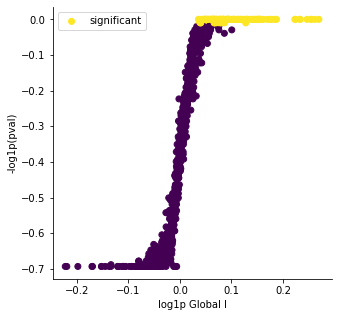

In [12]:
fig = plt.figure(figsize=(5,5))
ax = plt.axes()
plt.scatter(np.log1p(my_sample.global_I), -np.log1p(my_sample.global_res.perm_pval), c =my_sample.global_res.selected)
plt.xlabel('log1p Global I')
plt.ylabel('-log1p(pval)')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.legend(['significant'], loc='upper left')

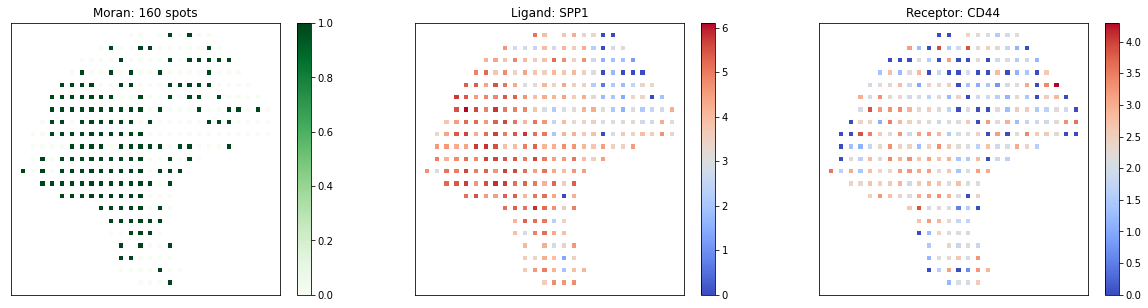

In [79]:
plot_pairs(my_sample, ['SPP1_CD44'])

## Spatial Clustering of Local Spots

In [17]:
import NaiveDE
import SpatialDE

In [22]:
# SpatialDE code
bin_spots = my_sample.selected_spots.astype(int)[my_sample.n_spots>2]

results = SpatialDE.run(my_sample.spatialcoord, bin_spots.transpose())

histology_results, patterns = SpatialDE.aeh.spatial_patterns(my_sample.spatialcoord, bin_spots.transpose(),
                                                             results, C=6, l=3,
                                                             verbosity=1)

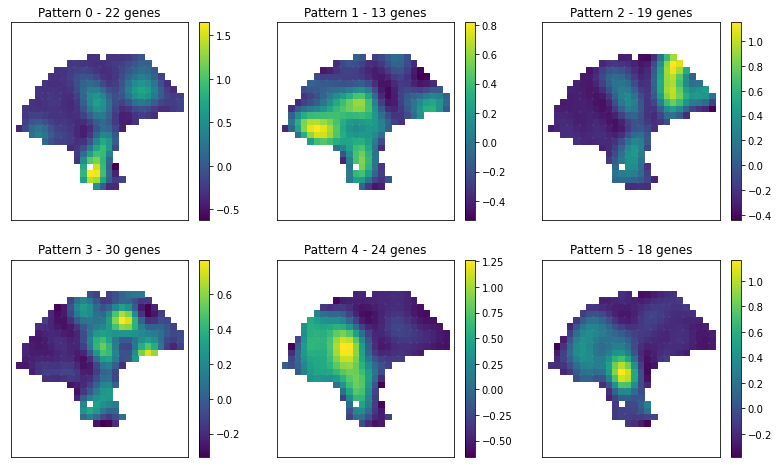

In [28]:
plt.figure(figsize=(18/4*3,8))
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.scatter(my_sample.spatialcoord['x'], my_sample.spatialcoord['y'], marker = 's',c=patterns[i], s=35);
    plt.axis('equal')
    plt_util('Pattern {} - {} genes'.format(i, histology_results.query('pattern == @i').shape[0] ))
#     plt.colorbar(ticks=[])
#     plt.savefig('SpatialDE_patterns.pdf') #2 # new dfb


In [29]:
dic=dict()
for i in histology_results.sort_values('pattern').pattern.unique():
    dic['Pattern_{}'.format(i)]=histology_results.query('pattern == @i').sort_values('membership')['g'].values

In [71]:
compute_pathway(my_sample, dic)

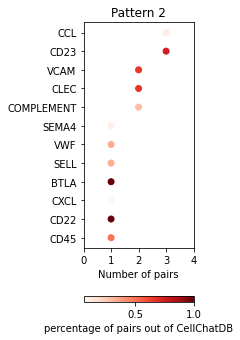

In [75]:
dot_path(my_sample, 2)

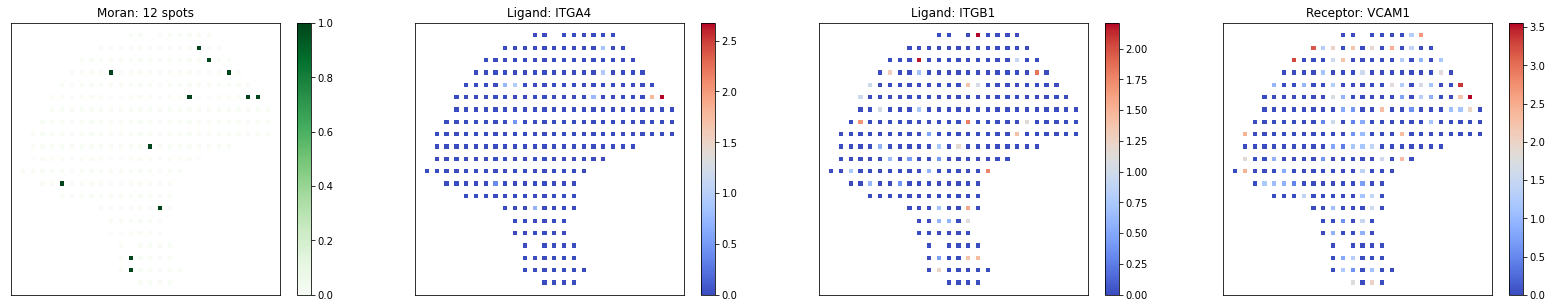

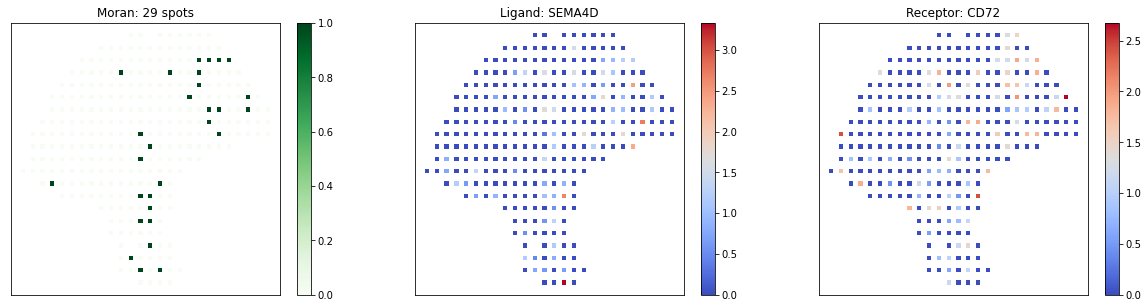

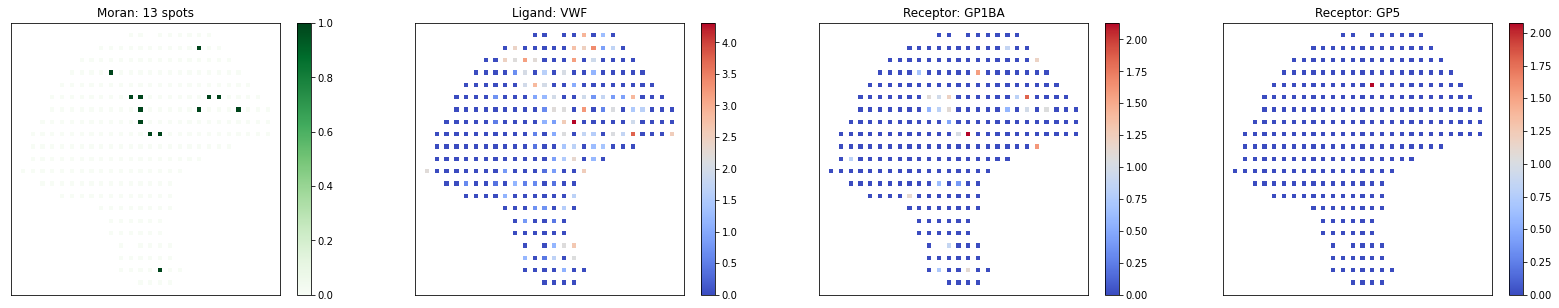

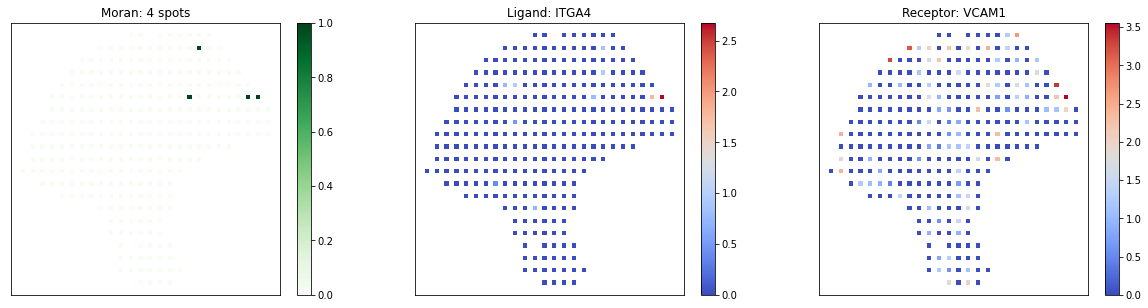

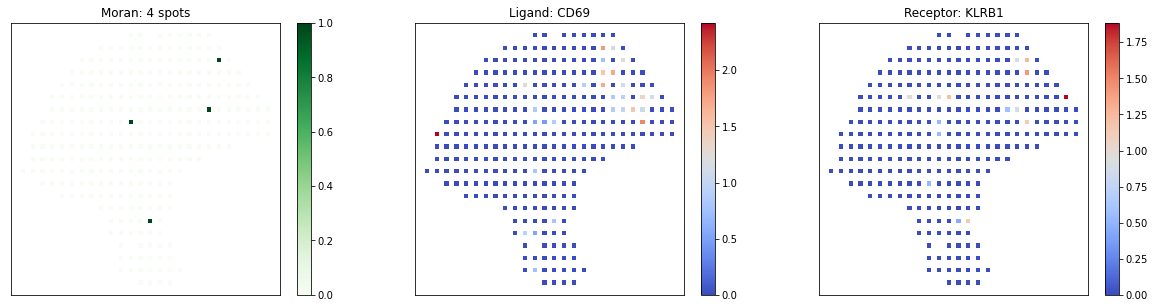

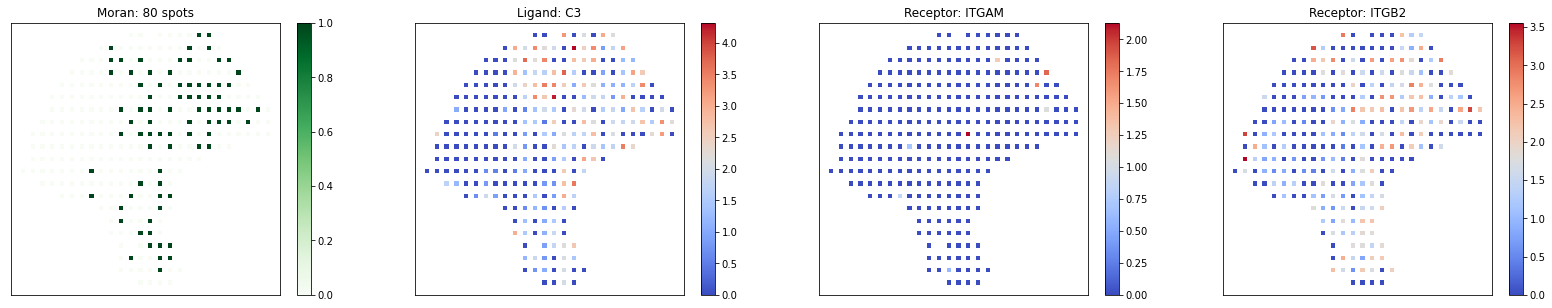

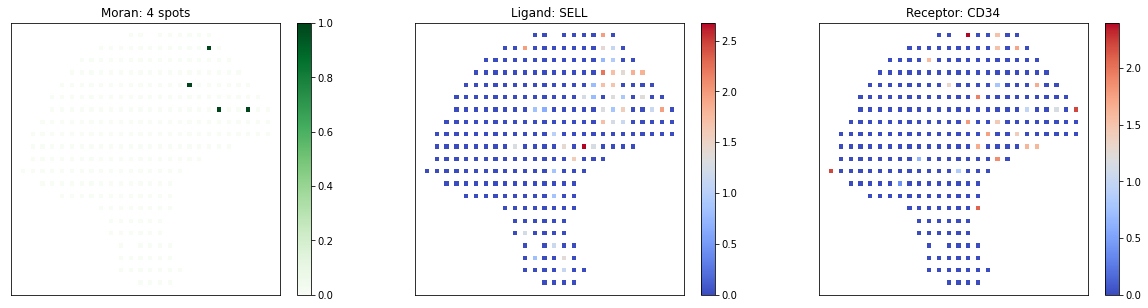

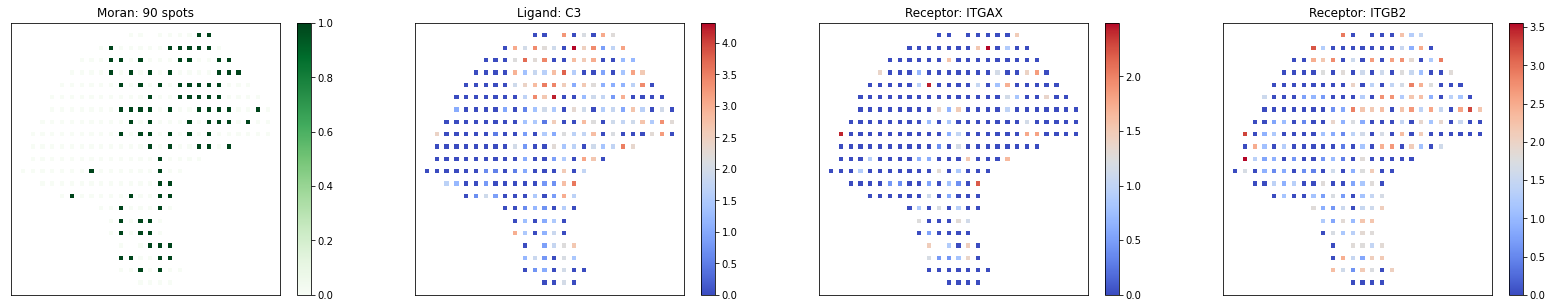

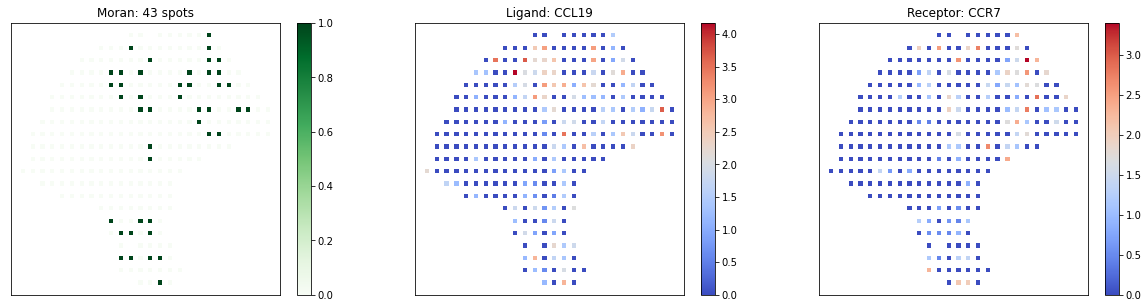

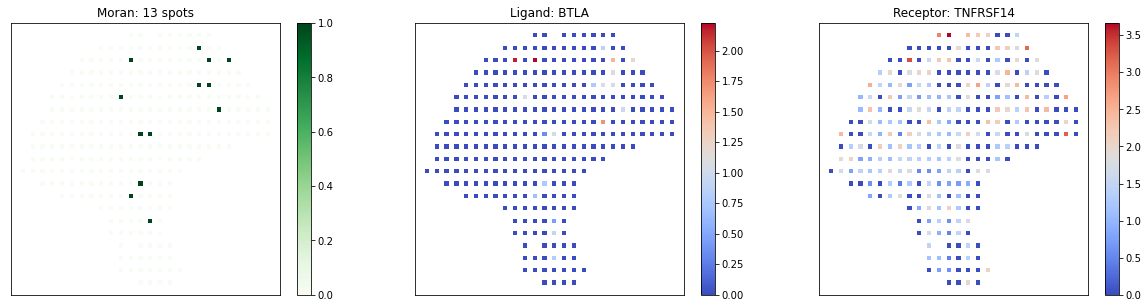

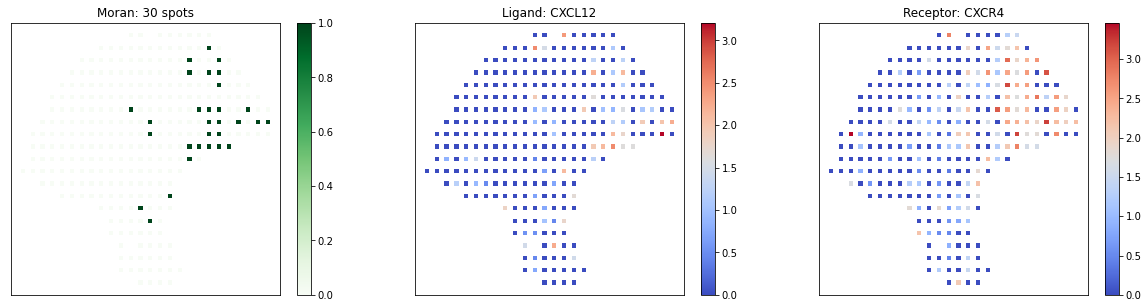

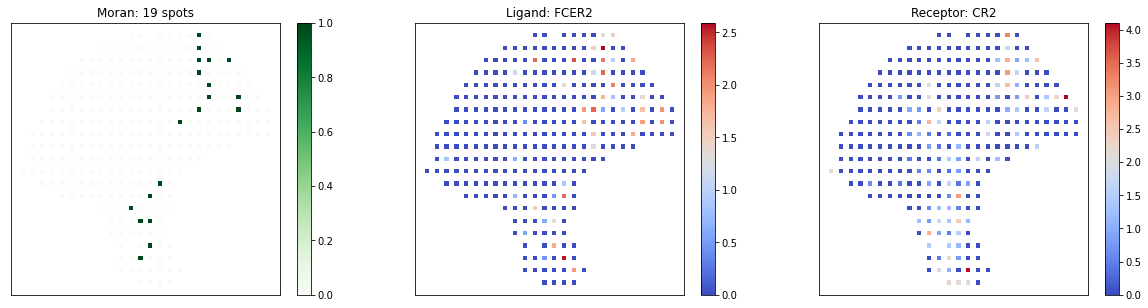

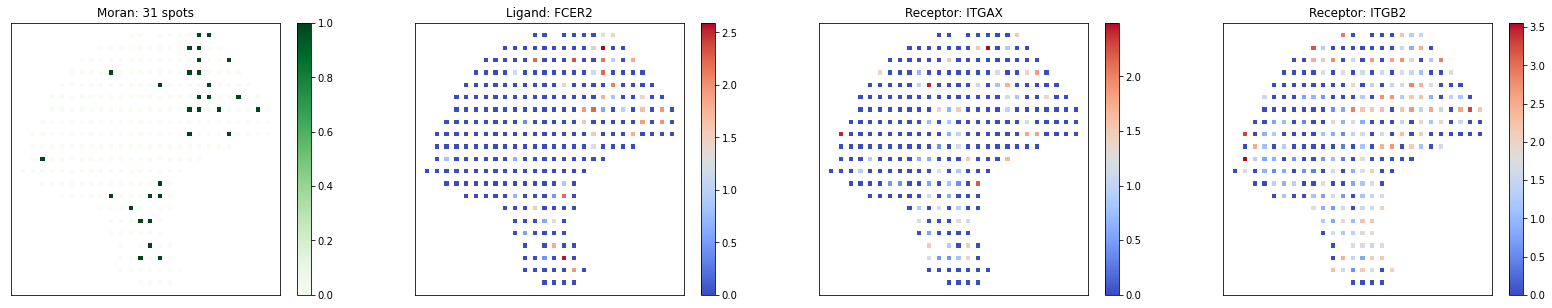

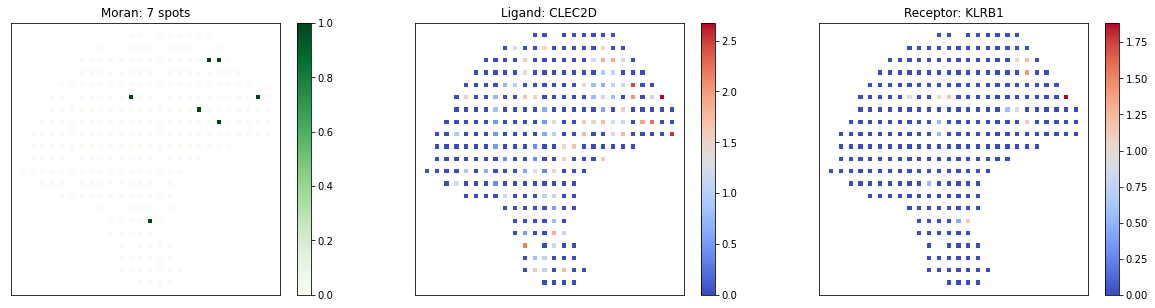

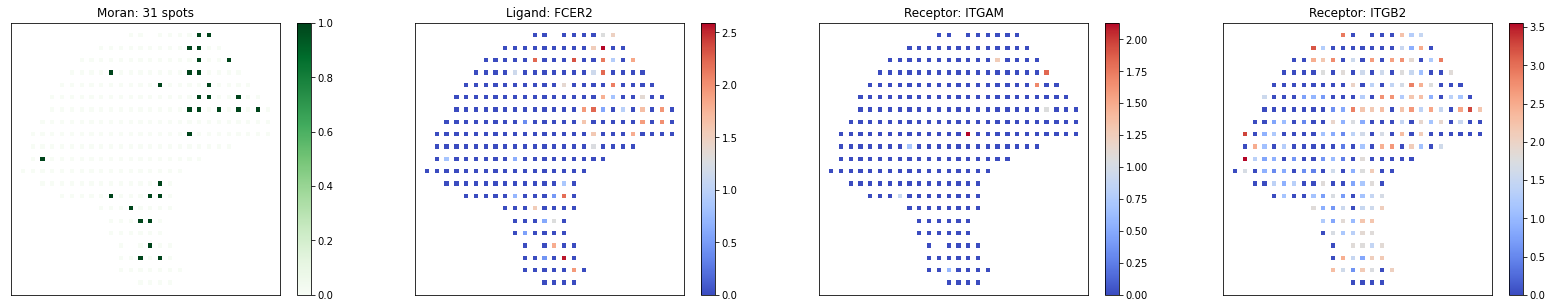

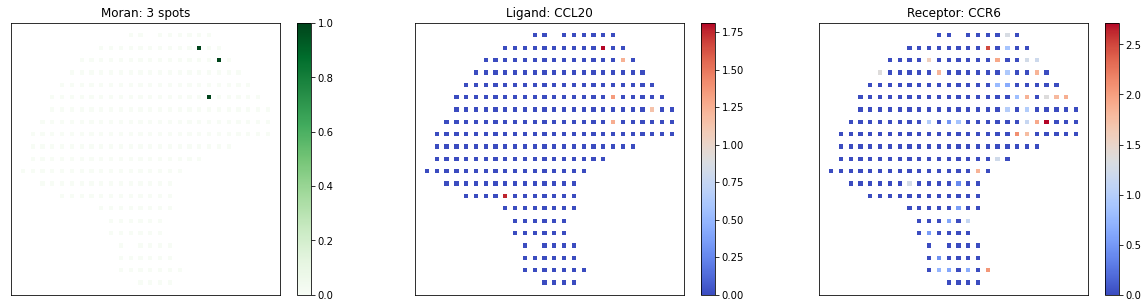

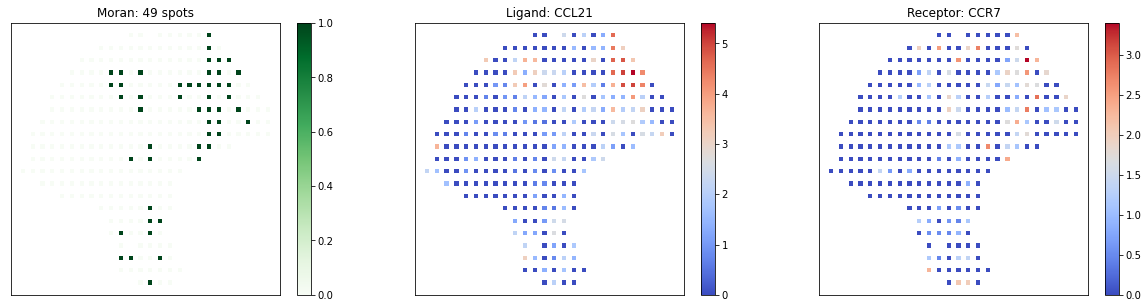

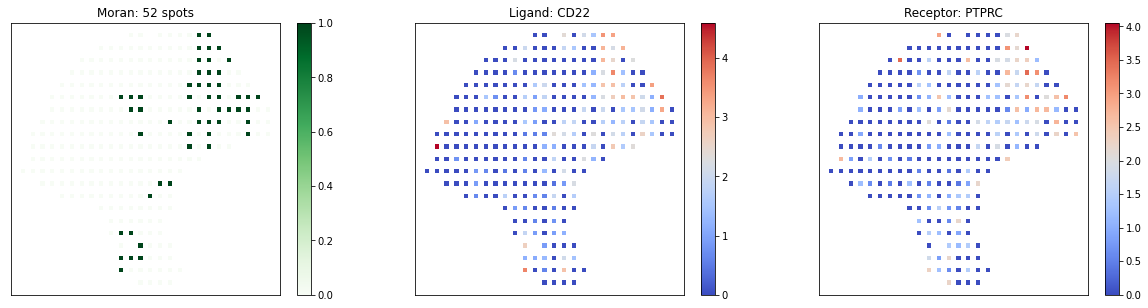

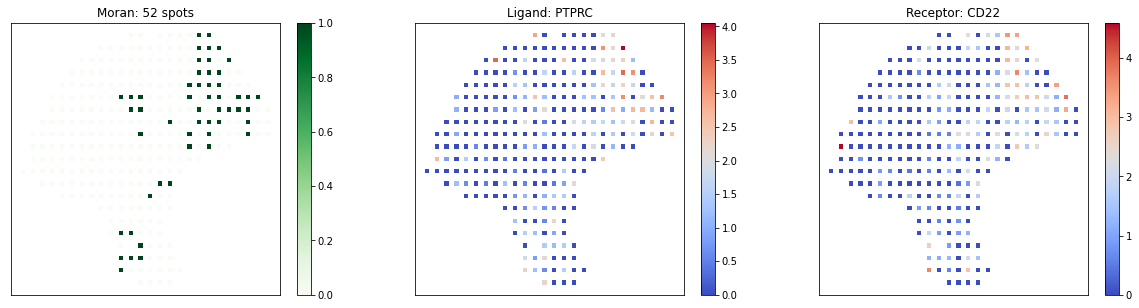

In [76]:
# visualize pattern 2 pairs
plot_pairs(my_sample, dic['Pattern_2'])

## permutation-zscore consistency

/home/yoyo/miniconda2/envs/CC/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


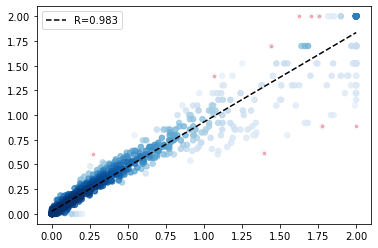

In [129]:
x = -np.log10(my_sample.global_res.z_pval.values)
y = -np.log10(my_sample.global_res.perm_pval)
# x = x[~np.isinf(y)]
# y = y[~np.isinf(y)]
x = np.where(x>2, 2, x)
y = np.where(np.isinf(y), 2, y)

corr_plot(x, y, method='spearman')

/tmp/ipykernel_48769/1966206804.py:2: RuntimeWarning: divide by zero encountered in log10
  y=-np.log10(np.hstack(my_sample.local_perm_p.values))


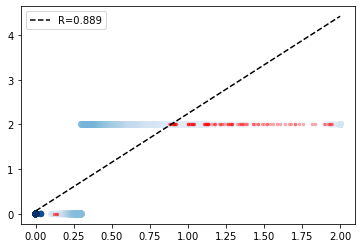

In [188]:
x=-np.log10(np.hstack(my_sample.local_z_p))
y=-np.log10(np.hstack(my_sample.local_perm_p.values))
x = np.where(x>2, 2, x)
y = np.where(np.isinf(y), 2, y)
corr_plot(x, y, method='spearman')

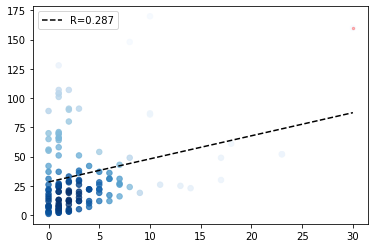

In [189]:
x=(my_sample.local_z_p<0.1).sum(1)
y=(my_sample.local_perm_p<0.1).sum(1)
# x = np.where(x>2, 2, x)
# y = np.where(np.isinf(y), 2, y)
# plt.xlim([0,100])
# plt.ylim([0,600])
corr_plot(x, y, method='pearson')

In [168]:
# raw TODO
raw=pd.read_csv(datadir + 'countsTumor.csv',header=0,index_col=0)
raw = raw.transpose()
raw.index = spatialcoord.index
raw.head()

,PSME2,CUEDC1,RPLP1,TM9SF3,DEF8,RPL37A,NELL1,MFGE8,AIP,TSC22D3,...,TREM1,C2CD4A,TAF1L,PEBP4,BCL2L15,MYBPC2,RHOD,PPEF1,CKMT2,PGM5P2
1,2,0,21,0,0,28,2,2,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,13,0,0,13,0,3,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,13,0,0,15,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,18,0,1,17,2,3,1,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,10,0,0,3,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0


In [169]:
raw_sample = SpatialDM(raw, spatialcoord)     # load spatial data

raw_sample.weight_matrix(l=1.2, cutoff=0.2, single_cell=False) # weight_matrix by rbf kernel

In [170]:
raw_sample.extract_lr('human', '/home/yoyo/1_spatial', min_cell=3)      # find overlapping LRs from CellChatDB

In [176]:
spatialdm_global(raw_sample, 1000, select_num=None, nproc=50)

raw_sample.sig_pairs(method='z-score', fdr=True, threshold=0.1)     # select significant pairs

raw_sample.spatialdm_local(n_perm=100, method='both', select_num=None, nproc=50)     # local spot selection
raw_sample.sig_spots(method='permutation', fdr=False, threshold=0.1)     # significant local spots

sub
0
0pairs global selection finished in: 0.020355701446533203
sub
1
1pairs global selection finished in: 0.005064249038696289
sub
2
2pairs global selection finished in: 0.005025625228881836
sub
3
3pairs global selection finished in: 0.004302024841308594
sub
4
4pairs global selection finished in: 0.004166126251220703
sub
5
5pairs global selection finished in: 0.004013538360595703
sub
6
6pairs global selection finished in: 0.0040738582611083984
sub
7
7pairs global selection finished in: 0.003902912139892578
sub
8
8pairs global selection finished in: 0.004172086715698242
sub
9
9pairs global selection finished in: 0.004436492919921875
sub
10
10pairs global selection finished in: 0.0038444995880126953
sub
11
11pairs global selection finished in: 0.0037527084350585938
sub
12
12pairs global selection finished in: 0.003735065460205078
sub
13
13pairs global selection finished in: 0.0037479400634765625
sub
14
14pairs global selection finished in: 0.00439453125
sub
15
15pairs global selection f

126
126pairs global selection finished in: 0.004042387008666992
sub
127
127pairs global selection finished in: 0.0038743019104003906
sub
128
128pairs global selection finished in: 0.003896951675415039
sub
129
129pairs global selection finished in: 0.003860950469970703
sub
130
130pairs global selection finished in: 0.003900289535522461
sub
131
131pairs global selection finished in: 0.0038576126098632812
sub
132
132pairs global selection finished in: 0.0038726329803466797
sub
133
133pairs global selection finished in: 0.0038747787475585938
sub
134
134pairs global selection finished in: 0.0038509368896484375
sub
135
135pairs global selection finished in: 0.0038836002349853516
sub
136
136pairs global selection finished in: 0.003875732421875
sub
137
137pairs global selection finished in: 0.0038614273071289062
sub
138
138pairs global selection finished in: 0.0039331912994384766
sub
139
139pairs global selection finished in: 0.0038564205169677734
sub
140
140pairs global selection finished in:

312pairs global selection finished in: 0.0040149688720703125
sub
313
313pairs global selection finished in: 0.00395965576171875
sub
314
314pairs global selection finished in: 0.0039026737213134766
sub
315
315pairs global selection finished in: 0.0039823055267333984
sub
316
316pairs global selection finished in: 0.003945589065551758
sub
317
317pairs global selection finished in: 0.003912210464477539
sub
318
318pairs global selection finished in: 0.003924369812011719
sub
319
319pairs global selection finished in: 0.003935098648071289
sub
320
320pairs global selection finished in: 0.003987550735473633
sub
321
321pairs global selection finished in: 0.00399327278137207
sub
322
322pairs global selection finished in: 0.003910064697265625
sub
323
323pairs global selection finished in: 0.003905057907104492
sub
324
324pairs global selection finished in: 0.0038750171661376953
sub
325
325pairs global selection finished in: 0.003900289535522461
sub
326
326pairs global selection finished in: 0.00388

487pairs global selection finished in: 0.00411534309387207
sub
488
488pairs global selection finished in: 0.007100343704223633
sub
489
489pairs global selection finished in: 0.0043239593505859375
sub
490
490pairs global selection finished in: 0.004134178161621094
sub
491
491pairs global selection finished in: 0.004211902618408203
sub
492
492pairs global selection finished in: 0.004101991653442383
sub
493
493pairs global selection finished in: 0.00436854362487793
sub
494
494pairs global selection finished in: 0.004239320755004883
sub
495
495pairs global selection finished in: 0.0041332244873046875
sub
496
496pairs global selection finished in: 0.0042421817779541016
sub
497
497pairs global selection finished in: 0.003938913345336914
sub
498
498pairs global selection finished in: 0.004209041595458984
sub
499
499pairs global selection finished in: 0.004214286804199219
sub
500
500pairs global selection finished in: 0.004294872283935547
sub
501
501pairs global selection finished in: 0.004039

627pairs global selection finished in: 0.00476837158203125
sub
628
628pairs global selection finished in: 0.003950357437133789
sub
629
629pairs global selection finished in: 0.003957033157348633
sub
630
630pairs global selection finished in: 0.004023313522338867
sub
631
631pairs global selection finished in: 0.003935337066650391
sub
632
632pairs global selection finished in: 0.003908395767211914
sub
633
633pairs global selection finished in: 0.0039005279541015625
sub
634
634pairs global selection finished in: 0.003931999206542969
sub
635
635pairs global selection finished in: 0.005536556243896484
sub
636
636pairs global selection finished in: 0.00957036018371582
sub
637
637pairs global selection finished in: 0.004282712936401367
sub
638
638pairs global selection finished in: 0.004221200942993164
sub
639
639pairs global selection finished in: 0.003941059112548828
sub
640
640pairs global selection finished in: 0.004513740539550781
sub
641
641pairs global selection finished in: 0.00399684

774pairs global selection finished in: 0.006333112716674805
sub
775
775pairs global selection finished in: 0.0039288997650146484
sub
776
776pairs global selection finished in: 0.0038945674896240234
sub
777
777pairs global selection finished in: 0.0038857460021972656
sub
778
778pairs global selection finished in: 0.003911256790161133
sub
779
779pairs global selection finished in: 0.0038886070251464844
sub
780
780pairs global selection finished in: 0.0038945674896240234
sub
781
781pairs global selection finished in: 0.003877878189086914
sub
782
782pairs global selection finished in: 0.003923892974853516
sub
783
783pairs global selection finished in: 0.00390625
sub
784
784pairs global selection finished in: 0.003927707672119141
sub
785
785pairs global selection finished in: 0.0039370059967041016
sub
786
786pairs global selection finished in: 0.003911733627319336
sub
787
787pairs global selection finished in: 0.0038983821868896484
sub
788
788pairs global selection finished in: 0.0038967132

sel_ind
[900 901 902 903 904 905 906 907 908 909 910 911 912 913 914 915 916 917
 918 919 920 921 922 923 924 925 926 927 928 929 930 931 932 933 934 935
 936 937 938 939 940 941 942 943 944 945]
sub
900
900pairs global selection finished in: 0.01605987548828125
sub
901
901pairs global selection finished in: 0.004000186920166016
sub
902
902pairs global selection finished in: 0.005779743194580078
sub
903
903pairs global selection finished in: 0.007826566696166992
sub
904
904pairs global selection finished in: 0.008075952529907227
sub
905
905pairs global selection finished in: 0.007352590560913086
sub
906
906pairs global selection finished in: 0.006258487701416016
sub
907
907pairs global selection finished in: 0.004077434539794922
sub
908
908pairs global selection finished in: 0.003928184509277344
sub
909
909pairs global selection finished in: 0.004000186920166016
sub
910
910pairs global selection finished in: 0.004058361053466797
sub
911
911pairs global selection finished in: 0.00399923

/tmp/ipykernel_48769/4170368111.py:1: RuntimeWarning: divide by zero encountered in log10
  x=-np.log10(np.hstack(raw_sample.local_z_p))
/tmp/ipykernel_48769/4170368111.py:2: RuntimeWarning: divide by zero encountered in log10
  y=-np.log10(np.hstack(raw_sample.local_perm_p))


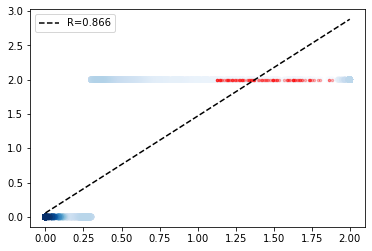

In [181]:
x=-np.log10(np.hstack(raw_sample.local_z_p))
y=-np.log10(np.hstack(raw_sample.local_perm_p))
x = np.where(x>2, 2, x)
y = np.where(np.isinf(y), 2, y)
corr_plot(x, y, method='spearman')

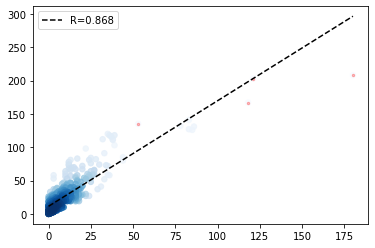

In [185]:
x=(raw_sample.local_z_p<0.1).sum(1)
y=(raw_sample.local_perm_p<0.1).sum(1)
# x = np.where(x>2, 2, x)
# y = np.where(np.isinf(y), 2, y)
# plt.xlim([0,100])
# plt.ylim([0,600])
corr_plot(x, y, method='pearson')

In [197]:
id_raw=raw_sample.global_res[raw_sample.global_res.selected].index

id_log=my_sample.global_res[my_sample.global_res.selected].index

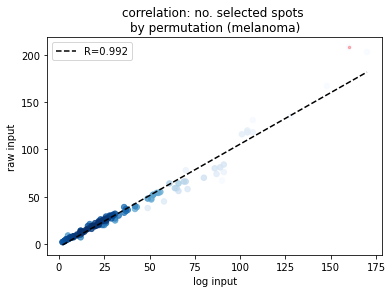

In [302]:
corr_plot((my_sample.local_perm_p[id_log.isin(id_raw)]<0.1).sum(1).values, 
            (raw_sample.local_perm_p[id_raw.isin(id_log)]<0.1).sum(1))
plt.title('correlation: no. selected spots \nby permutation (melanoma)')
plt.xlabel('log input')
plt.ylabel('raw input')
plt.savefig('../tutorial/PDFs/raw_log_corr_mel.pdf')